# Import necessary dependencies and settings

In [1]:
#Ausschnitte aus dem Code von Sarkar
# teils korrigiert und ergänzt - siehe Anmerkungen und Kommentare (Im Sarkar-Code - auch im Buch - sind Fehler)

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import sklearn

pd.options.display.max_colwidth = 200
%matplotlib inline

# Sample corpus of text documents

Kleiner Korpus mit teils hohen Übereinstimmungen, um die Funktionsweise der Algorithmen sichtbar zu machen.

Anmerkung: hier wird etwas verwegen mit numpy und pandas herumjongliert. Das ist eigentlich nicht wirklich nötig...

In [4]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus,
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


# Simple text pre-processing

Vereinfachte Normalisierung: Sonderzeichen entfernen, alles klein, Stoppwörter raus.
Vectorize: wendet die Funktion auf ein Array an - also auf jedes Element

In [5]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [6]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

# Bag of Words Model

Der CountVectorizer macht genau das: Er zählt für eine Menge von Dokumenten die einzelnen Wörter und gibt eine Matrix 
(|Dokumente| x |Unterschiedliche Wörter|) zurück mit den entsprechenden Counts an den richtigen Stellen.

Da diese Matrix üblicherweise überwiegend aus Nullen besteht, wird hier die "sparse representation" gewählt.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)  # minimale und maximale Dokumentenhäufigkeit, hier float, also Anteile - es werden alle Wörter gezählt
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [8]:
# view non-zero feature positions in the sparse matrix
print(cv_matrix)

  (0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 8)	1
  (5, 13)	1
  (5, 6)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 8)	1
  (7, 13)	1
  (7, 6)	1


In [9]:
# view dense representation 
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]],
      dtype=int64)

übersichtlicher wären die Wörter als Spaltennamen...

In [10]:
# get all unique words in the corpus
vocab = cv.get_feature_names_out()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


# Bag of N-Grams Model

Hier etwas abgekürzt die vorherigen Schritte alle auf einmal.

In [11]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2, 2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF Model

Wie erläutert sollen gerade seltenere Wörter stärker gewichtet werden. (Ob das wirklich besser ist, hängt vom Anwendungskontext ab.)

Der TfidfTransformer baut auf dem Ergebnis des CountVectorizers von weiter oben auf. Also erst BoW, dann TfIdf

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)  # Normierungen: l1 - Summe der Absolutzahlen ist 1; l2 - Summe der Quadrate ist 1; use_idf - sonst wäre es ein (normierter) bow; smooth_idf - zu jedem Wert +1, wie erläutert
tt_matrix = tt.fit_transform(cv_matrix)

tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


Es geht auch direkt: TfidfVectorizer kombiniert CountVectorizer und TfidfTransformer 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


# Understanding TF-IDF from Scratch

In [14]:
# get unique words as feature names
unique_words = list(set([word for doc in [doc.split() for doc in norm_corpus] for word in doc]))  # die list comprehension ermittelt alle Wörter, set eliminiert doppelt und list macht wieder eine Liste daraus; die list comprehension ist wieder etwas kompliziert zu lesen
def_feature_dict = {w: 0 for w in unique_words}
print('Feature Names:', unique_words)
print('Default Feature Dict:', def_feature_dict)

Feature Names: ['breakfast', 'dog', 'quick', 'green', 'sausages', 'kings', 'love', 'beautiful', 'sky', 'fox', 'blue', 'toast', 'ham', 'jumps', 'lazy', 'eggs', 'beans', 'today', 'bacon', 'brown']
Default Feature Dict: {'breakfast': 0, 'dog': 0, 'quick': 0, 'green': 0, 'sausages': 0, 'kings': 0, 'love': 0, 'beautiful': 0, 'sky': 0, 'fox': 0, 'blue': 0, 'toast': 0, 'ham': 0, 'jumps': 0, 'lazy': 0, 'eggs': 0, 'beans': 0, 'today': 0, 'bacon': 0, 'brown': 0}


In [15]:
from collections import Counter

# build bag of words features for each document - term frequencies
bow_features_list = []
for doc in norm_corpus:
    bow_feature_doc = Counter(doc.split())  # zählt die tatsächlich vorkommenden Wörter
    all_features = Counter(def_feature_dict)  # das ist der Default-Counter: alle überhaupt vorkommenden Wörter auf Count 0
    bow_feature_doc.update(all_features)  # Counter zusammenzählen
    bow_features_list.append(bow_feature_doc)  # und abspeichern

bow_features = pd.DataFrame(bow_features_list)
bow_features

,sky,blue,beautiful,breakfast,dog,quick,green,sausages,kings,love,fox,toast,ham,jumps,lazy,eggs,beans,today,bacon,brown
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1
3,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0
4,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0
5,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
6,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [16]:
import scipy.sparse as sp  # (veralteter) Zugang zu numpy-artigen arrays (könnte auch ersetzt werden) - hier nicht weiter erklärt sondern Verweis auf nächste Zelle

feature_names = list(bow_features.columns)

# build the document frequency matrix
df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
df = 1 + df  # adding 1 to smoothen idf later

# show document frequencies (+1)
pd.DataFrame([df], columns=feature_names)

,sky,blue,beautiful,breakfast,dog,quick,green,sausages,kings,love,fox,toast,ham,jumps,lazy,eggs,beans,today,bacon,brown
0,4,5,4,2,4,4,2,3,2,3,4,2,3,2,4,3,2,2,3,4


warum ist "sky" 4 und nicht 5? Hinweis: es geht um die document frequency, nicht die kumulierte term frequency

In [17]:
# Neuimplementierung ohne den Umweg von Sarkar über eigentlich unnötige Hilfskonstrukte

feature_names = list(bow_features.columns)  
df_count = Counter(feature_names)  # initialisiert den Counter für jedes Wort auf 1 - entspricht dem +1 oben
for cnt in bow_features_list:
    for wrd in cnt.keys():
        if cnt[wrd] > 0:
            df_count[wrd] += 1
# df_count

pd.DataFrame.from_dict(df_count, orient="index").T

,sky,blue,beautiful,breakfast,dog,quick,green,sausages,kings,love,fox,toast,ham,jumps,lazy,eggs,beans,today,bacon,brown
0,4,5,4,2,4,4,2,3,2,3,4,2,3,2,4,3,2,2,3,4


In [18]:
# compute inverse document frequencies
total_docs = 1 + len(norm_corpus)
idf = 1.0 + np.log(float(total_docs) / df)

# show smoothened idfs
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

,sky,blue,beautiful,breakfast,dog,quick,green,sausages,kings,love,fox,toast,ham,jumps,lazy,eggs,beans,today,bacon,brown
0,1.81,1.59,1.81,2.5,1.81,1.81,2.5,2.1,2.5,2.1,1.81,2.5,2.1,2.5,1.81,2.1,2.5,2.5,2.1,1.81


dran denken: invers - häufigere Wörter bekommen kleinere Werte!

nachrechnen für sky: total_docs = 8+1 = 9; ln(9/4) ~ 0.81 ; 0.81 + 1 = 1.81 

In [19]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')  # bow_features war dataframe, jetzt numpy array
tfidf = tf * idf  # Matrixmultiplikation
# view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,sky,blue,beautiful,breakfast,dog,quick,green,sausages,kings,love,fox,toast,ham,jumps,lazy,eggs,beans,today,bacon,brown
0,1.81,1.59,1.81,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
1,1.81,1.59,1.81,0.0,0.00,0.00,0.0,0.0,0.0,2.1,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
2,0.00,0.00,0.00,0.0,1.81,1.81,0.0,0.0,0.0,0.0,1.81,0.0,0.0,2.5,1.81,0.0,0.0,0.0,0.0,1.81
3,0.00,0.00,0.00,2.5,0.00,0.00,0.0,2.1,2.5,0.0,0.00,2.5,2.1,0.0,0.00,2.1,2.5,0.0,2.1,0.00
4,0.00,0.00,0.00,0.0,0.00,0.00,2.5,2.1,0.0,2.1,0.00,0.0,2.1,0.0,0.00,2.1,0.0,0.0,2.1,0.00
5,0.00,1.59,0.00,0.0,1.81,1.81,0.0,0.0,0.0,0.0,1.81,0.0,0.0,0.0,1.81,0.0,0.0,0.0,0.0,1.81
6,3.62,1.59,1.81,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,2.5,0.0,0.00
7,0.00,0.00,0.00,0.0,1.81,1.81,0.0,0.0,0.0,0.0,1.81,0.0,0.0,0.0,1.81,0.0,0.0,0.0,0.0,1.81


die meisten tf-Werte waren 1, interessant sind die Werte 2 (z.B. sky in Satz 6)

In [20]:
from numpy.linalg import norm

# compute L2 norms 
norms = norm(tfidf, axis=1)  # Normierungswert für jede Zeile (Dokument); default-norm ist die l2, die wir oben schon kennengelernt haben (Summe der Quadrate ist 1)

# print norms for each document
print(np.round(norms, 3))

[3.013 3.672 4.761 6.534 5.319 4.35  5.019 4.049]


das sind die Zahlen, durch die wir jeden tfidf-Wert teilen müssen, damit die Summe der Quadrate hinterher 1 ergibt

Probe: Wurzel(1.81^2 + 1.59^2 + 1.81^2) ~ 3.013

In [21]:
# compute normalized tfidf
norm_tfidf = tfidf / norms[:, None]

# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

,sky,blue,beautiful,breakfast,dog,quick,green,sausages,kings,love,fox,toast,ham,jumps,lazy,eggs,beans,today,bacon,brown
0,0.60,0.53,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
1,0.49,0.43,0.49,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
2,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.53,0.38,0.00,0.00,0.0,0.00,0.38
3,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.32,0.38,0.00,0.00,0.38,0.32,0.00,0.00,0.32,0.38,0.0,0.32,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.47,0.39,0.00,0.39,0.00,0.00,0.39,0.00,0.00,0.39,0.00,0.0,0.39,0.00
5,0.00,0.37,0.00,0.00,0.42,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.00,0.00,0.42,0.00,0.00,0.0,0.00,0.42
6,0.72,0.32,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00
7,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.45,0.00,0.00,0.0,0.00,0.45


Probe: 0.6^2 + 0.52^2 + 0.6^2 ~ 1

Warum wird überhaupt normiert?
Hinweis: Vektorlänge (Summe der Quadrate)

In [22]:
new_doc = 'the sky is green today'

pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2),
             columns=tv.get_feature_names_out())

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.63


# Document Similarity

mit den eben mühsam errechneten Werten haben wir jetzt eine Grundlage für die Ähnlichkeitsanalyse von Dokumenten
Hypothese: ähnliche Dokumente bestehen teilweise aus den gleichen Wörtern und können so über Wort-Vektoren ermittelt werden

welche Dokumente wären das in unserem Beispiel?

In [23]:
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

In [24]:
#nur zum Vergleich: so wurden vorher die Werte berechnet (Sarkar)
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


In [25]:
# Document Similarity - anderer Algorithmus pdist
#  dient als Eingabe für das linkage später
#  Hintergrund: linkage

from scipy.spatial.distance import pdist

similarity_matrix_pdist = pdist(tv_matrix, "cosine")
similarity_df_pdist = pd.DataFrame(similarity_matrix_pdist)
similarity_df_pdist #Darstellung flat array

,0
0,0.179401
1,1.000000
2,1.000000
3,1.000000
4,0.807647
5,0.182754
6,1.000000
7,1.000000
8,1.000000
9,0.774511


In [26]:
#bessere Darstellung erwünscht
from scipy.spatial.distance import squareform
pd.DataFrame(squareform(similarity_matrix_pdist))

#Wie man sieht, sind die Werte "invertiert" (1-x)
# das sind die Abstände

,0,1,2,3,4,5,6,7
0,0.000000,0.179401,1.000000,1.000000,1.000000,0.807647,0.182754,1.000000
1,0.179401,0.000000,1.000000,1.000000,0.774511,0.842155,0.329369,1.000000
2,1.000000,1.000000,0.000000,1.000000,1.000000,0.208179,1.000000,0.149484
3,1.000000,1.000000,1.000000,0.000000,0.493134,1.000000,1.000000,1.000000
4,1.000000,0.774511,1.000000,0.493134,0.000000,1.000000,1.000000,1.000000
5,0.807647,0.842155,0.208179,1.000000,1.000000,0.000000,0.884512,0.069011
6,0.182754,0.329369,1.000000,1.000000,1.000000,0.884512,0.000000,1.000000
7,1.000000,1.000000,0.149484,1.000000,1.000000,0.069011,1.000000,0.000000


## Clustering documents using similarity features - single - pdist

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

#wir können wie besprochen "ward" nicht verwenden
# also probieren wir eine andere Methode aus: single link

Z = linkage(similarity_matrix_pdist, 'single')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2',
                         'Distance', 'Cluster Size'], dtype='object')

#Erklärung: Dokumente 5 und 7 haben den geringsten Abstand, daher werden sie
# auch zuerst zu einem Cluster zusammengesetzt, mit dem Bezeichner 8
# Der Abstand von 2 zu diesem neuen Cluster ist der kleinere der Abstände von 2 zu 5 oder 7
# Der nächst kleinste Abstand ist der zwischen 0 und 1 usw.

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,5.0,7.0,0.069011,2.0
1,2.0,8.0,0.149484,3.0
2,0.0,1.0,0.179401,2.0
3,6.0,10.0,0.182754,3.0
4,3.0,4.0,0.493134,2.0
5,11.0,12.0,0.774511,5.0
6,9.0,13.0,0.807647,8.0


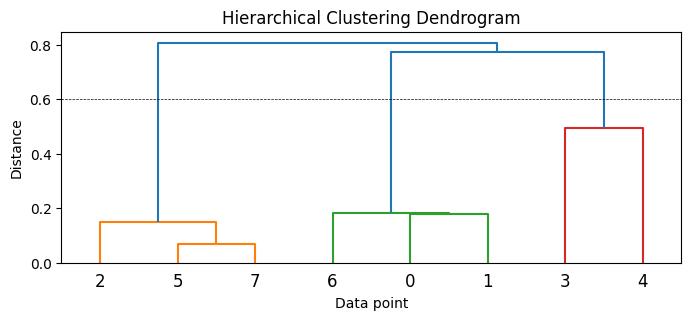

In [28]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=0.6, c='k', ls='--', lw=0.5)
#plt.savefig("K:/Documents/Lehre/KE/cluster-pdist-single")

## Clustering documents using similarity features - complete - pdist

In [29]:
# Variante: complete link

Z_c = linkage(similarity_matrix_pdist, 'complete')
pd.DataFrame(Z_c, columns=['Document\Cluster 1', 'Document\Cluster 2',
                         'Distance', 'Cluster Size'], dtype='object')

#Erklärung: der Anfang ist (immer) gleich. Im zweiten Schritt wird nun aber 0 und 1
# geclustert, da sich der Abstand von 2 zu 8 nun anders berechnet (maximum)

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,5.0,7.0,0.069011,2.0
1,0.0,1.0,0.179401,2.0
2,2.0,8.0,0.208179,3.0
3,6.0,9.0,0.329369,3.0
4,3.0,4.0,0.493134,2.0
5,11.0,12.0,1.0,5.0
6,10.0,13.0,1.0,8.0


## Clustering documents using similarity features - average - pdist

In [30]:
# Variante: average link

Z_a = linkage(similarity_matrix_pdist, 'average')
pd.DataFrame(Z_a, columns=['Document\Cluster 1', 'Document\Cluster 2',
                         'Distance', 'Cluster Size'], dtype='object')

#Erklärung: hier ist wieder die erste Reihenfolge, allerdings mit anderen Werten sobald
# neue Cluster da sind - siehe bspw. 2 und 8 als Mittelwert der vorherigen Werte

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,5.0,7.0,0.069011,2.0
1,2.0,8.0,0.178831,3.0
2,0.0,1.0,0.179401,2.0
3,6.0,10.0,0.256061,3.0
4,3.0,4.0,0.493134,2.0
5,9.0,11.0,0.948257,6.0
6,12.0,13.0,0.981209,8.0


## Clustering documents using similarity features - weighted - pdist

In [31]:
# Variante: weighted link

Z_w = linkage(similarity_matrix_pdist, 'weighted')
pd.DataFrame(Z_w, columns=['Document\Cluster 1', 'Document\Cluster 2',
                         'Distance', 'Cluster Size'], dtype='object')

#hier ergeben sich erst bei grösseren Clustern Unterschiede

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,5.0,7.0,0.069011,2.0
1,2.0,8.0,0.178831,3.0
2,0.0,1.0,0.179401,2.0
3,6.0,10.0,0.256061,3.0
4,3.0,4.0,0.493134,2.0
5,9.0,11.0,0.963677,6.0
6,12.0,13.0,0.985907,8.0
